In [39]:
# instalando a versão a ser utilziada do matplotlib
! pip install -q -U matplotlib==3.2.1

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mat
import sqlite3
import datetime as dt
import time
# Utilizando os graficos no próprio jupyter
%matplotlib notebook 

In [43]:
# Criando a conexão com o banco
con = sqlite3.connect("teste.db")

In [44]:
# Criando o cursor para manipulação das tabelas
cur = con.cursor()

In [45]:
# Criando tabela
def create_table():
    cur.execute('CREATE TABLE IF NOT EXISTS EXEMPLO (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,'\
    'DATA TEXT, SEMANA TEXT)')


# Inserindo de forma automatizada os valores
def automatic_insert_values():
    # Extraindo a data atual, contendo apenas a data (sem o strftime teria horas)
    # OBS:DATETIME E TIME OFERECE SUPORTE AO STRFTIME/STRPTIME
    # %H:%M para horas e minutos caso precisar
    semana = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
    data = dt.datetime.today()
    week_now = dt.date.weekday(data)
    date_now = data.strftime('%d/%m/%y')
    week_now = semana[week_now]
    cur.execute("INSERT INTO EXEMPLO(data, semana) VALUES(?, ?)", (date_now, week_now))
    con.commit()
    cur.close
    con.close

In [46]:
# Imprimir todos dados de uma vez
def select_all():
    cur.execute("SELECT * FROM EXEMPLO")
    for i in cur.fetchall():
        print(i)

        
# Impondo uma condição na busca de dados
def select_condition():
    cur.execute("SELECT * FROM EXEMPLO WHERE ID > 1")
    for i in cur.fetchall():
        print("ID: %d - %s: Data - Dia da Semana: %s "%i)
        
               
# Selecionando uma coluna
def select_column():
    cur.execute("SELECT * FROM EXEMPLO")
    for i in cur.fetchall():
        print("Dia - %s" %i[2])

# Atualizando os dados 
def update_dados():
    cur.execute("UPDATE EXEMPLO SET data = '14/11/20' WHERE id = 1")
    con.commit()
    
def remove_dados():
    cur.execute("DELETE FROM EXEMPLO WHERE ID = 4")
    con.commit()

In [65]:
# Gerando gráficos com os dados no banco de dados
def dados_grafics():
    cur.execute("SELECT ID, DATA FROM EXEMPLO")
    ids = []
    dts = []
    dados = cur.fetchall()
    for row in dados:
        ids.append(row[0])
        dts.append(row[1])
    
    plt.bar(dts, ids)
    plt.title('Dados da Table')
    
    plt.xlabel('Datas')
    plt.ylabel('Ids')
    plt.show()

<IPython.core.display.Javascript object>


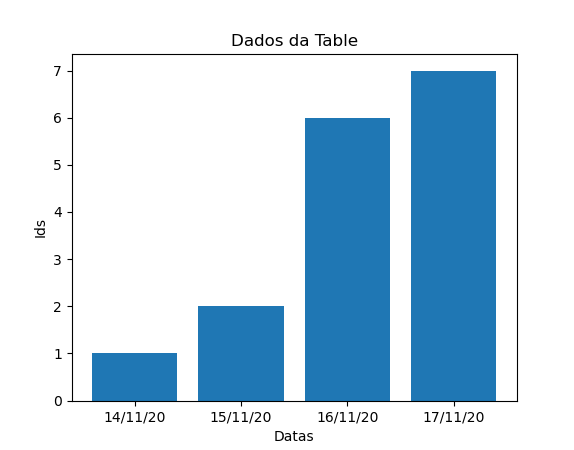

In [66]:
dados_grafics()

In [33]:
# Inserção de dados utilizando o autmatic
for i in range(1):
    automatic_insert_values()
    time.sleep(2)

In [34]:
select_all()

(1, '14/11/20', 'Sexta')
(2, '15/11/20', 'Sábado')
(5, '16/11/20', 'Domingo')
(6, '16/11/20', 'Segunda')
(7, '17/11/20', 'Terça')


In [35]:
select_condition()

ID: 2 - 15/11/20: Data - Dia da Semana: Sábado 
ID: 5 - 16/11/20: Data - Dia da Semana: Domingo 
ID: 6 - 16/11/20: Data - Dia da Semana: Segunda 
ID: 7 - 17/11/20: Data - Dia da Semana: Terça 


In [36]:
select_column()

Dia - Sexta
Dia - Sábado
Dia - Domingo
Dia - Segunda
Dia - Terça


In [27]:
remove_dados()

In [16]:
update_dados()

In [37]:
cur.close()

In [49]:
con.close()
